In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import joblib
from sklearn.model_selection import KFold

In [3]:
def plot_learning_curve(estimator, title, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object
        An object of that type which is cloned for each validation.
        This object is assumed to implement the scikit-learn estimator interface.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features)
        Target relative to X for classification or regression;
        None for unsupervised learning.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Default is 5-fold cross-validation.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        None means 1 unless in a joblib.parallel_backend context.
        -1 means using all processors.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.

    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or a scorer callable object / function with
        signature scorer(estimator, X, y).
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="blue", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [4]:
pd.set_option('display.max_columns',50)

In [5]:
df = pd.read_csv(r"/kaggle/input/feature-common-language/audio_features_partial.csv")
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label,file_path
0,0.712224,0.055740,2989.050985,2193.800068,5666.294643,0.275144,-202.32579,27.614292,4.094784,5.301181,1.110721,8.136593,7.078041,3.598137,-3.177295,-0.030978,-3.537456,-3.020052,4.752774,-0.985637,-6.752584,-4.679379,-5.478848,-0.866508,-1.919669,-0.634521,Arabic,/kaggle/input/preprocess-common-language/proce...
1,0.598403,0.074004,2372.315827,2065.561020,4795.649510,0.178041,-137.41476,59.931843,5.077963,-5.712012,-18.202295,-10.059123,-21.016857,-6.377454,-18.172323,5.052943,-6.669989,-8.498067,-12.469353,-2.134825,-10.989368,-1.460541,-4.485021,-0.408789,-8.211143,-5.170048,Arabic,/kaggle/input/preprocess-common-language/proce...
2,0.756316,0.046051,3274.178654,2196.474265,5870.572917,0.353054,-233.02031,22.691550,10.057923,3.829097,-12.786670,-10.884504,-4.380457,-4.090909,-2.924069,-3.809806,-3.680117,-0.519686,-1.657243,-5.409642,-4.017134,-6.744406,-1.697630,-0.387302,0.829549,1.292110,Arabic,/kaggle/input/preprocess-common-language/proce...
3,0.588983,0.061376,1948.418292,2049.242741,4186.921296,0.137682,-199.04490,80.806870,31.451380,-1.297673,-27.375967,-15.695191,-8.427319,-9.908805,-4.317192,-2.046760,2.011840,0.351793,-4.202263,0.065943,-9.312079,-7.164060,-3.082040,-8.046175,-3.083879,-2.018449,Arabic,/kaggle/input/preprocess-common-language/proce...
4,0.647222,0.069638,1705.618989,1824.714129,3730.709877,0.095540,-325.47556,92.373820,17.725632,31.867613,5.700902,-6.233201,9.072336,4.565443,1.436532,2.745791,2.822273,5.910376,3.169903,4.538502,-1.073114,-1.204524,-0.108214,-4.803460,-2.882802,-1.455632,Arabic,/kaggle/input/preprocess-common-language/proce...


### feature encode

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder with your actual labels
label_encoder.fit(df['label'])

# Transform actual labels to numeric labels
df['numeric_labels'] = label_encoder.transform(df['label'])

In [19]:
X = df.drop(columns=['label','numeric_labels','file_path'])
y = df['numeric_labels']

### resampling

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
from collections import Counter

# Jumlah kelas sebelum SMOTE
print("Jumlah kelas sebelum SMOTE:")
print(Counter(y))

# Jumlah kelas setelah SMOTE
print("\nJumlah kelas setelah SMOTE:")
print(Counter(y_resampled))

Jumlah kelas sebelum SMOTE:
Counter({2: 3570, 39: 3177, 19: 3012, 6: 3003, 27: 2955, 41: 2784, 24: 2766, 0: 2751, 20: 2733, 37: 2691, 10: 2550, 33: 2547, 18: 2520, 21: 2484, 42: 2472, 8: 2442, 40: 2367, 26: 2331, 30: 2283, 28: 2277, 23: 2268, 32: 2238, 7: 2202, 31: 2196, 43: 2181, 15: 2073, 44: 2073, 5: 2016, 34: 1977, 9: 1962, 25: 1947, 12: 1932, 1: 1914, 16: 1890, 29: 1884, 14: 1863, 3: 1830, 17: 1830, 4: 1797, 11: 1773, 35: 1758, 36: 1752, 38: 1737, 22: 1695, 13: 1623})

Jumlah kelas setelah SMOTE:
Counter({0: 3570, 4: 3570, 9: 3570, 27: 3570, 18: 3570, 24: 3570, 23: 3570, 13: 3570, 20: 3570, 11: 3570, 16: 3570, 40: 3570, 28: 3570, 15: 3570, 21: 3570, 8: 3570, 31: 3570, 29: 3570, 5: 3570, 7: 3570, 41: 3570, 44: 3570, 3: 3570, 2: 3570, 14: 3570, 43: 3570, 36: 3570, 26: 3570, 34: 3570, 12: 3570, 37: 3570, 35: 3570, 42: 3570, 33: 3570, 17: 3570, 25: 3570, 6: 3570, 30: 3570, 39: 3570, 22: 3570, 10: 3570, 1: 3570, 19: 3570, 32: 3570, 38: 3570})


### split data

In [10]:
### split data 80% 20%

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y_resampled)

# MODELING

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model pada data latih
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
# Prediksi dengan data uji
y_pred = rf_model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Random Forest: {accuracy:.5f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi model Random Forest: 0.80187
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       714
           1       0.69      0.82      0.75       714
           2       0.81      0.79      0.80       714
           3       0.74      0.78      0.76       714
           4       0.77      0.79      0.78       714
           5       0.69      0.82      0.75       714
           6       0.80      0.64      0.71       714
           7       0.75      0.91      0.82       714
           8       0.78      0.78      0.78       714
           9       0.79      0.89      0.83       714
          10       0.80      0.71      0.76       714
          11       0.81      0.74      0.78       714
          12       0.81      0.79      0.80       714
          13       0.77      0.88      0.82       714
          14       0.80      0.76      0.78       714
          15       0.77      0.83      0.80       714
          16       0.84      0.95      0.89 

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


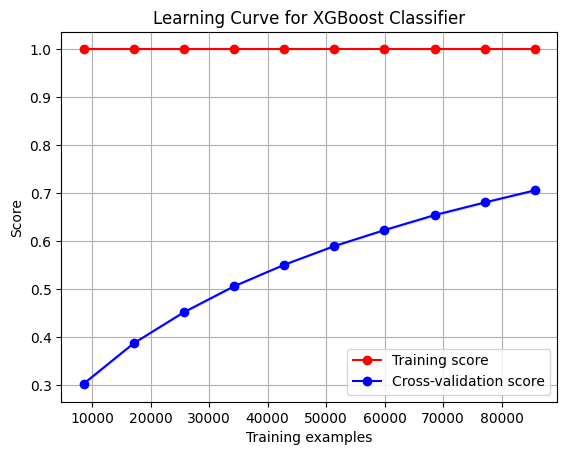

In [77]:
plot_learning_curve(rf_model, "Learning Curve for RF Classifier", X_train, y_train)

### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
# Prediksi dengan data uji
y_pred_dt = dt.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi model Decision tree: {accuracy:.5f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred_dt))

Akurasi model Decision tree: 0.42642
              precision    recall  f1-score   support

           0       0.33      0.30      0.31       714
           1       0.40      0.42      0.41       714
           2       0.41      0.38      0.39       714
           3       0.37      0.40      0.38       714
           4       0.39      0.42      0.40       714
           5       0.42      0.39      0.41       714
           6       0.31      0.29      0.30       714
           7       0.52      0.55      0.54       714
           8       0.40      0.36      0.38       714
           9       0.52      0.55      0.53       714
          10       0.31      0.32      0.31       714
          11       0.39      0.39      0.39       714
          12       0.39      0.39      0.39       714
          13       0.48      0.50      0.49       714
          14       0.42      0.40      0.41       714
          15       0.41      0.44      0.42       714
          16       0.61      0.61      0.61 

### Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(42)
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [91]:
y_pred_nb = nb.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi model Decision tree: {accuracy:.5f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred_nb))

Akurasi model Decision tree: 0.12337
              precision    recall  f1-score   support

           0       0.07      0.02      0.03       714
           1       0.21      0.02      0.03       714
           2       0.16      0.22      0.18       714
           3       0.05      0.00      0.01       714
           4       0.16      0.02      0.03       714
           5       0.16      0.26      0.20       714
           6       0.14      0.01      0.02       714
           7       0.15      0.24      0.19       714
           8       0.19      0.01      0.02       714
           9       0.20      0.08      0.12       714
          10       0.10      0.01      0.02       714
          11       0.05      0.10      0.07       714
          12       0.04      0.00      0.00       714
          13       0.12      0.20      0.15       714
          14       0.04      0.02      0.03       714
          15       0.20      0.06      0.09       714
          16       0.16      0.43      0.24 

### XGBoostClassifier

In [94]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softmax',random_state=42)
xgb.fit(X_train, y_train, eval_metric='mlogloss', 
        eval_set=[(X_train, y_train), (X_test, y_test)])

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:3.42579	validation_1-mlogloss:3.49208
[1]	validation_0-mlogloss:3.25513	validation_1-mlogloss:3.36585
[2]	validation_0-mlogloss:3.12177	validation_1-mlogloss:3.26829
[3]	validation_0-mlogloss:3.00844	validation_1-mlogloss:3.18763
[4]	validation_0-mlogloss:2.91079	validation_1-mlogloss:3.12016
[5]	validation_0-mlogloss:2.82435	validation_1-mlogloss:3.06033
[6]	validation_0-mlogloss:2.74778	validation_1-mlogloss:3.00906
[7]	validation_0-mlogloss:2.67834	validation_1-mlogloss:2.96211
[8]	validation_0-mlogloss:2.61317	validation_1-mlogloss:2.91855
[9]	validation_0-mlogloss:2.55304	validation_1-mlogloss:2.87912
[10]	validation_0-mlogloss:2.49777	validation_1-mlogloss:2.84441
[11]	validation_0-mlogloss:2.44773	validation_1-mlogloss:2.81091
[12]	validation_0-mlogloss:2.40187	validation_1-mlogloss:2.78178
[13]	validation_0-mlogloss:2.35618	validation_1-mlogloss:2.75324
[14]	validation_0-mlogloss:2.31410	validation_1-mlogloss:2.72723
[15]	validation_0-mlogloss:2.27127	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [95]:
y_pred_xg = nb.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_xg)
print(f"Akurasi model Decision tree: {accuracy:.5f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred_xg))

Akurasi model Decision tree: 0.12337
              precision    recall  f1-score   support

           0       0.07      0.02      0.03       714
           1       0.21      0.02      0.03       714
           2       0.16      0.22      0.18       714
           3       0.05      0.00      0.01       714
           4       0.16      0.02      0.03       714
           5       0.16      0.26      0.20       714
           6       0.14      0.01      0.02       714
           7       0.15      0.24      0.19       714
           8       0.19      0.01      0.02       714
           9       0.20      0.08      0.12       714
          10       0.10      0.01      0.02       714
          11       0.05      0.10      0.07       714
          12       0.04      0.00      0.00       714
          13       0.12      0.20      0.15       714
          14       0.04      0.02      0.03       714
          15       0.20      0.06      0.09       714
          16       0.16      0.43      0.24 

### SVM

In [82]:
from sklearn.svm import SVC

svc=SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [89]:
# Prediksi dengan data uji
y_pred_svc = svc.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Akurasi model SVM: {accuracy:.5f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred_svc))

Akurasi model SVM: 0.04382
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       714
           1       0.00      0.00      0.00       714
           2       0.42      0.01      0.01       714
           3       0.00      0.00      0.00       714
           4       0.00      0.00      0.00       714
           5       0.50      0.00      0.01       714
           6       0.00      0.00      0.00       714
           7       0.08      0.00      0.01       714
           8       0.00      0.00      0.00       714
           9       0.02      0.00      0.00       714
          10       0.00      0.00      0.00       714
          11       0.04      0.06      0.05       714
          12       0.00      0.00      0.00       714
          13       0.03      0.15      0.06       714
          14       0.05      0.02      0.03       714
          15       0.00      0.00      0.00       714
          16       0.04      0.28      0.07       714


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [88]:
# Prediksi dengan data uji
y_pred_knn = knn.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi model KNN: {accuracy:.5f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred_knn))

Akurasi model Decision tree: 0.61127
              precision    recall  f1-score   support

           0       0.53      0.44      0.48       714
           1       0.63      0.69      0.66       714
           2       0.39      0.22      0.29       714
           3       0.62      0.72      0.66       714
           4       0.65      0.72      0.68       714
           5       0.70      0.70      0.70       714
           6       0.48      0.33      0.39       714
           7       0.63      0.69      0.66       714
           8       0.57      0.52      0.54       714
           9       0.70      0.71      0.70       714
          10       0.53      0.53      0.53       714
          11       0.62      0.70      0.66       714
          12       0.61      0.69      0.65       714
          13       0.71      0.81      0.76       714
          14       0.61      0.67      0.64       714
          15       0.63      0.63      0.63       714
          16       0.73      0.79      0.76 

### Gradient Boost Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [97]:
# Prediksi dengan data uji
y_pred_gb = gb.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Akurasi model Gradient Boost: {accuracy:.5f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred_gb))

Akurasi model Gradient Boost: 0.26617
              precision    recall  f1-score   support

           0       0.21      0.08      0.11       714
           1       0.13      0.11      0.12       714
           2       0.35      0.37      0.36       714
           3       0.14      0.12      0.13       714
           4       0.16      0.13      0.14       714
           5       0.22      0.33      0.26       714
           6       0.18      0.08      0.11       714
           7       0.30      0.42      0.35       714
           8       0.23      0.18      0.20       714
           9       0.42      0.42      0.42       714
          10       0.17      0.09      0.12       714
          11       0.13      0.08      0.10       714
          12       0.12      0.08      0.10       714
          13       0.26      0.39      0.31       714
          14       0.15      0.09      0.12       714
          15       0.25      0.30      0.27       714
          16       0.42      0.60      0.49

### ELM

In [17]:
from hpelm import ELM
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
# One-hot encoding pada kolom label
df_encoded = pd.get_dummies(df, columns=['numeric_labels'], prefix='lang')

In [30]:
# Pisahkan fitur dan label
X = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('lang_')] + ['label', 'file_path'])
y = df_encoded[[col for col in df_encoded.columns if col.startswith('lang_')]]

In [32]:
from imblearn.over_sampling import SMOTE

# Konversi label dari one-hot encoding ke label numerik
y_numeric = y.idxmax(axis=1).str.replace('lang_', '').astype(int)

# Aplikasikan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_numeric)

# Konversi kembali label ke one-hot encoding
y_resampled_onehot = pd.get_dummies(y_resampled, prefix='lang')

In [33]:
# Ubah ke numpy array
X_resampled = X_resampled.values
y_resampled_onehot = y_resampled_onehot.values

In [34]:
# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_onehot, test_size=0.2, random_state=42)

In [46]:
# Inisialisasi model
model = ELM(inputs=X_train.shape[1], outputs=y_train.shape[1])
model.add_neurons(10000, 'sigm')  # Menambahkan 10000 neuron dengan fungsi aktivasi sigmoid
model.train(X_train, y_train, 'c', 'OP', rcond=None)  # 'c' untuk klasifikasi
y_pred = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/hpelm/nnets/slfn.py:62: RuntimeWarning: overflow encountered in exp
  self.func["sigm"] = lambda X, W, B: 1 / (1 + np.exp(np.dot(X, W) + B))


Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


/opt/conda/lib/python3.10/site-packages/hpelm/nnets/slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]


In [47]:
# Evaluasi
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

Accuracy: 0.17201991907874262
